# Basics
## from AE to VAE
- AE (Autoencoder) are generally used for dimensionality reduction, primarily for compression and reconstruction. VAE (Variational Autoencoder) is used for generative purposes, such as image generation.
    - latent/smaller/compressed representation
    - About latent variables ($z$): latent variable models
        - latent variables: Hidden and unobservable variables that are not directly observable (variables);
            - For example, evaluating health or IQ by inferring through a set of observable indicators.
        - LDM: Latent Diffusion Model
    - AE focuses on learning z (latent vectors/variables), with the first half (encoder) being supervised to ensure a good encoder; 
        - VAE focuses on the generative process.
- In summary:
    - Input: $x$, hidden: $\mu, \sigma$, output: $\tilde x$
        - $x$: Data that is observable; latent variable models assume that the latent space $z$ causes $x$.
        - From a probabilistic graphical model perspective, it is $z\rightarrow x$ (the generation process in generative models).
    - Encoder: $q_\phi(z|x), x\rightarrow z$
    - latent distribution：$z=\mu+\sigma\odot \epsilon$
    - Decoder: $p_\theta(x|z), z\rightarrow \tilde x$

## Network architecture
- Encoder & Decoder
    - Encoder: $q(z|x)$（neural network parameters as $\phi$）=> $q_\phi(z|x)$
        - inference network, infers latent variables z
    - Decoder: $p(x|z)$（neural network parameters as $\theta$）=> $p_\theta(x|z)$
        - generate network
- latent space
    - Output of the encoder, which are two vectors: one is the mean vector $\mu$ and the other is the standard deviation vector $\sigma$. They have the same length and together define how the input data is represented in the latent space.

## loss function
$$
\mathcal L(\theta, \phi;\mathbf x, \mathbf z)=\underbrace{\mathbb E_{q_\phi(z|x)}\left[\log p_\theta(x|z)\right]}_{\text{reconstruction loss}}-\underbrace{D_{KL}\left(q_\phi(z|x)\|p(z)\right)}_{\text{stay close to Normal(0,1)}}
$$

### variational inference
- We want to calculate the posterior probability of $z$.

    $$
    p_\theta(z|x)=\frac{p_\theta(x|z)p_\theta(z)}{p_\theta(x)}=\frac{p_\theta(x|z)p_\theta(z)}{\int p_\theta(x, z)dz}
    $$
    - The denominator $p_\theta(x)$ (marginal likelihood or evidence) is difficult to compute. There are two main approaches to calculate it:
        - Monte Carlo sampling
        - Variational inference

- If we need to calculate the **posterior $p_\theta(z|x)$**, we introduce $q_\phi(z)$ as an approximate probability distribution ($\sum_z q_\phi(z)=1$).
$$
\begin{split}
KL\left[q_\phi(z)\|p_\theta(z|x)\right]&=-\sum_zq_\phi(z)\log \frac{p_\theta(z|x)}{q_\phi(z)}\\
&=-\underset{z}{\sum} q_{\phi}(z) \log \bigg( \frac{p_{\theta}(x,z)}{q_{\phi}(z)} \cdot \frac{1}{p_{\theta}(x)} \bigg) \\
&= -\underset{z}{\sum} q_{\phi}(z) \bigg( \log\frac{p_{\theta}(x,z)}{q_{\phi}(z)} - \log p_{\theta}(x) \bigg) \\
&= -\underset{z}{\sum} q_{\phi}(z) \log \frac{p_{\theta}(x,z)}{q_{\phi}(z)} + \underset{z}{\sum} q_{\phi}(z) \log p_{\theta}(x)\\
&=
-\underset{z}{\sum} q_{\phi}(z) \log \frac{p_{\theta}(x,z)}{q_{\phi}(z)} + \log p_{\theta}(x)
\end{split}
$$
    
$$
\log p_{\theta}(x) = \underbrace{KL[q_{\phi}(z) \lVert p_{\theta}(z \lvert x)]}_{\text{kl div}} + \underbrace{\underset{z}{\sum} q_{\phi}(z) \log \frac{p_{\theta}(x,z)}{q_{\phi}(z)}}_{\text{variational lower bound /ELBO}}\\
\underbrace{\underset{z}{\sum} q_{\phi}(z) \log \frac{p_{\theta}(x,z)}{q_{\phi}(z)}}_{\text{variational lower bound /ELBO}}=\log p_{\theta}(x)-\underbrace{KL[q_{\phi}(z) \lVert p_{\theta}(z \lvert x)]}_{\text{kl div}}
$$

### ELBO
- Evidence ($p(x)$) Lower BOund

    $$
    \begin{align}
    \mathcal{L} &= \underset{z}{\sum} q_{\phi}(z) \log \frac{p_{\theta}(x,z)}{q_{\phi}(z)} \\
    &= \mathbb{E}_{q_{\phi}(z)} \log \frac{p_{\theta}(x,z)}{q_{\phi}(z)}
    \end{align}
    $$
- Since KL divergence is non-negative, we have $\log p_\theta(x) \geq \mathcal{L}$, where $\mathcal{L}$ is the lower bound of the marginal log likelihood.
- Variational inference focuses on how to improve the ELBO rather than maximizing the likelihood directly.
    - Maximizing the ELBO is also the process of maximizing $\log p_\theta(x)$ (maximizing the evidence $p(x)$) and minimizing $\underbrace{\text{KL}[q_\phi(z) \lVert p_\theta(z \mid x)]}_{\text{KL divergence}}$.

### VAE
$$
\begin{align}
\mathcal{L} &= \underset{z}{\sum} q_{\phi}(z) \log \frac{p_{\theta}(x,z)}{q_{\phi}(z)} \\
&= \mathbb{E}_{q_{\phi}(z)} \log \frac{p_{\theta}(x,z)}{q_{\phi}(z)} \\
&= \mathbb{E}_{q_{\phi}(z)} \log \frac{p_{\theta}(x \lvert z)p_{\theta}(z)}{q_{\phi}(z)} \\
&= \mathbb{E}_{q_{\phi}(z)} \log p_{\theta}(x \lvert z) +  \mathbb{E}_{q_{\phi}(z)} \log \frac{p_{\theta}(z)}{q_{\phi}(z)} \\
&= \mathbb{E}_{q_{\phi}(z)} \log p_{\theta}(x \lvert z) - KL[q_{\phi}(z) \lVert p_{\theta}(z)]
\end{align}
$$
- Since we choose $q_\phi(z)$ to approximate the posterior $p_\theta(z|x)$, we select $z$ conditional on $x$, i.e., $q_\phi(z) = q_\phi(z|x)$, thus

    $$
    \mathcal{L} = \underbrace{\mathbb{E}_{q_{\phi}(z|x)} \log p_{\theta}(x \mid z)}_{\text{reconstruction loss}} - \underbrace{\text{KL}[q_{\phi}(z|x) \lVert p_{\theta}(z)]}_{\text{regularization}}
    $$
    - $p_\theta(z) = \mathcal{N}(0, I)$ (diagonal unit Gaussian), the prior assumption;

- This formula is the famous objective of VAE that aims to maximize the ELBO (maximizing ELBO);
    - Note that it is maximizing, and the right-hand side is not a loss but its negation, indicating the actual minimization target.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib.pyplot import imshow

In [2]:
class VAE(nn.Module):
    def __init__(self, in_channels = 3, latent_dim = 4, image_size = 512):
        super(VAE, self).__init__()
        self.in_channels = in_channels
        self.latent_dim = latent_dim
        self.image_size = image_size
        
        # Encoder
        # 3 * 512 * 515 => 4 * 64 *64
        self.encodr = nn.Sequential(
            self._conv_block(in_channels, 64), # 64 * 256 * 256
            self._conv_block(64, 128), # 128 * 128 * 128
            self._conv_block(128, 256), # 256 * 64 *64
        )
        
        # Encoder output in latent space
        self.mu = nn.Conv2d(256, latent_dim, kernel_size=1) # 4 * 64 * 64 <- latent space
        self.log_var = nn.Conv2d(256, latent_dim, kernel_size=1) # 4 * 64 * 64 <- latent space
        
        # Decoder
        # 4 * 64 * 64 => 3 * 512 * 512
        self.decoder_input = nn.ConvTranspose2d(latent_dim, 256, 1) # 256 * 64 * 64
        self.decoder = nn.Sequential(
            self._conv_block_transpose(256, 128), # 256 * 64 * 64
            self._conv_block_transpose(128, 64), # 128 * 128 * 128
            self._conv_block_transpose(64, in_channels), # 64 * 256 * 256
        )
        
        self.sigmoid = nn.Sigmoid() # [0, 1]
        self.tanh = nn.Tanh() # [-1, 1]
    
    def _conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2),
        )
    
    def _conv_block_transpose(self, in_channels, out_channels):
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2),
        )
    
    def encode(self, input):
        result = self.encodr(input)
        mu = self.mu(result)
        log_var = self.log_var(result)
        return mu, log_var
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        # z = mu + eps*std
        return mu + eps * std
    
    def decode(self, z):
        # If the original image is normalized to [-1, 1], then use tanh
        return self.tanh(self.decoder(self.decoder_input(z)))
    
    def forward(self, input):
        mu, log_var = self.encode(input)
        z = self.reparameterize(mu, log_var)
        # return reconstruction, input, mu, log_var
        return self.decode(z), input, mu, log_var

$$
\begin{gather}
\frac{\log\sigma^2}2=\log \sigma \\
\exp\left(\frac{\log\sigma^2}2\right)=\exp(\log \sigma)=\sigma
\end{gather}
$$

## training 

### sampling: reparameterization trick
- Reparameterization Trick: $z = \mu + \sigma \odot \epsilon$, where $\epsilon \sim \mathcal{N}(0, I)$
- The reparameterization trick makes backpropagation possible;
    - In VAE, we hope to sample from the latent space, which is typically defined by parameters (like mean and variance) output by a neural network. However, drawing samples directly from such a distribution is a stochastic process, making it impossible to directly backpropagate through it because gradients cannot pass through stochastic nodes.
- The reparameterization trick, its basic idea is to rewrite the random sampling process as a differentiable operation. Specifically, this is done as follows:
    - Seperate randomness from network parameters, $q_\phi(z|x)$ predicts $\mu, \sigma$. Instead of directly sampling from this parameterized distribution, we draw a random noise from a standard normal distribution $\mathcal{N}(0,1)$, denoted as $\epsilon$.
    - Reparameterization transformation, based on the previous step, we can calculate the latent variable $z = \mu + \sigma \odot \epsilon = g_{\mu, \sigma}(\epsilon)$ (element-wise product).
        - The key here is that the noise $\epsilon$ is random, but once drawn, it becomes a fixed value, making the entire expression differentiable.
        - $z = \mu + \sigma \odot \epsilon$ compared to $z \sim q_\phi(z|x)$, directly taking the value instead of sampling.

### training loss
```
reconst_loss = F.mse_loss(reconstruction, x, reduction='sum')
kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
```
$$
\begin{align*}
\int q_{\theta}(z) \log p(z) \, dz &= \int \mathcal{N}\left(z; \mu, \sigma^2\right) \log \mathcal{N}(z; 0, I) \, dz \\
&= -\frac{J}{2} \log(2\pi) - \frac{1}{2} \sum_{j=1}^{J} \left( \mu_j^2 + \sigma_j^2 \right)
\end{align*}
$$
And:
$$
\begin{align*}
\int q_{\theta}(z) \log q_{\theta}(z) \, dz &= \int \mathcal{N}\left(z; \mu, \sigma^2\right) \log \mathcal{N}\left(z; \mu, \sigma^2\right) \, dz \\
&= -\frac{J}{2} \log(2\pi) - \frac{1}{2} \sum_{j=1}^{J} \left( 1 + \log \sigma_j^2 \right)
\end{align*}
$$
Therefore:
$$
\begin{align*}
-D_{KL}\left(q_{\phi}(z) || p_{\theta}(z)\right) &= \int q_{\theta}(z) \left( \log p_{\theta}(z) - \log q_{\theta}(z) \right) dz \\
&= \frac{1}{2} \sum_{j=1}^{J} \left( 1 + \log \left( \sigma_j^2 \right) - \mu_j^2 - \sigma_j^2 \right)
\end{align*}
$$

In [3]:
def vae_loss_fuction(reconstruction, x, mu, log_var, kld_weight = 0.1):
    mse = F.mse_loss(reconstruction, x, reduction='sum')
    kld = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    
    total_loss = mse + kld_weight * kld
    
    return total_loss, mse, kld

### inference/generating
```
# Sample from the standard normal distribution
z = torch.randn(batch_size, z_dim).to(device)
out = model.decode(z).view(-1, 1, 28, 28)
```
- The encoding (latent) space is usually continuous, allowing for random sampling from the latent space and generating new images through the decoder.
    - sample from a distribution

## Coding

In [4]:
import os
from torchvision import transforms
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from datasets import load_dataset

device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)

# Create a directory if not exists
sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

In [5]:
device

device(type='cuda')

In [6]:
# Hyper-parameters
batch_size = 8
learning_rate = 1e-3
num_epochs = 200
image_size = 512
latent_dim = 4

preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # 512 x 512
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10), 
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), 
        transforms.ToTensor(), 
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Convert pixel values from [0, 1] to [-1, 1]
    ]
)

def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}

# dataset
dataset = load_dataset("SakanaAI/JA-VG-VQA-500",cache_dir="./data", split="train")

dataset.set_transform(transform)

train_dataset = dataset.select(range(0, 600))
val_dataset = dataset.select(range(600, 800))

# Data loader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

vae = VAE(in_channels = 3, latent_dim = 4, image_size = image_size).to(device)

optimizer = torch.optim.Adam(vae.parameters(), lr=learning_rate, weight_decay=1e-4)
# steps_per_epoch = len(train_loader)， total_steps = total_epochs * steps_per_epoch
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=1e-3, epochs=num_epochs, steps_per_epoch=len(train_dataloader))

# training
for epoch in range(num_epochs):
    vae.train()
    train_loss = 0
    for batch_idx, batch in enumerate(train_dataloader):
        
        data = batch["images"].to(device) # [batch, 3, 512, 512]
        optimizer.zero_grad()
        
        reconstruction, _, mu, log_var = vae(data)
        loss, reconstruction_loss, kld = vae_loss_fuction(reconstruction, data, mu, log_var)
        train_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        scheduler.step() # OneCycleLR call after each batch, others call after each epoch
        
        if (batch_idx + 1) % 25 == 0:
            print ("Epoch[{}/{}], Step [{}/{}], Learning rate: {:.6f}, total Loss: {:.4f}=Reconst Loss: {:.4f}+KL Div: {:.4f}" 
                   .format(epoch+1, num_epochs, batch_idx+1, len(train_dataloader),scheduler.get_last_lr()[0], 
                           loss.item(), reconstruction_loss.item(), kld.item()))
            
    avg_train_loss = train_loss / len(train_dataloader)

    # Validation loss
    vae.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_idx, batch in enumerate(val_dataloader):
            data = batch["images"].to(device)
            reconstruction, _, mu, log_var = vae(data)
            loss, _, _ = vae_loss_fuction(reconstruction, data, mu, log_var)
            val_loss += loss.item()
    
    avg_val_loss = val_loss / len(val_dataloader)
    
    print(f'====> Epoch: {epoch} | Learning rate: {scheduler.get_last_lr()[0]:.6f}')
    print(f'Train loss: {avg_train_loss:.4f} | Validation loss: {val_loss:.4f}')
    
    # Visualization
    if (epoch+1) % 20 == 0:
        with torch.no_grad():
            orig_batch_size = data.size(0)
            visual_batch_size = min(orig_batch_size, 8)
            comparison = torch.cat([data[:visual_batch_size], reconstruction.view(orig_batch_size, 3, image_size, image_size)[:visual_batch_size]])
            comparison = (comparison * 0.5) + 0.5 # [-1, 1] => [0, 1]
            save_image(comparison.cpu(), os.path.join(sample_dir, f'reconstruction_{epoch+1}.png'), nrow=visual_batch_size)
            
torch.save(vae.state_dict(), 'vae.pth')
print("Training Completed.")

Epoch[1/200], Step [25/75], Learning rate: 0.000040, total Loss: 1784910.0000=Reconst Loss: 1768046.0000+KL Div: 168639.5312
Epoch[1/200], Step [50/75], Learning rate: 0.000040, total Loss: 1775617.8750=Reconst Loss: 1749499.2500+KL Div: 261185.7500
Epoch[1/200], Step [75/75], Learning rate: 0.000041, total Loss: 1129706.8750=Reconst Loss: 1101445.2500+KL Div: 282615.8750
====> Epoch: 0 | Learning rate: 0.000041
Train loss: 1919480.7392 | Validation loss: 33850421.1875
Epoch[2/200], Step [25/75], Learning rate: 0.000041, total Loss: 1097273.6250=Reconst Loss: 1069369.1250+KL Div: 279045.0625
Epoch[2/200], Step [50/75], Learning rate: 0.000042, total Loss: 1376755.8750=Reconst Loss: 1348813.2500+KL Div: 279426.6250
Epoch[2/200], Step [75/75], Learning rate: 0.000043, total Loss: 1471955.1250=Reconst Loss: 1445225.0000+KL Div: 267301.0000
====> Epoch: 1 | Learning rate: 0.000043
Train loss: 1347592.5475 | Validation loss: 32051947.8125
Epoch[3/200], Step [25/75], Learning rate: 0.000044,

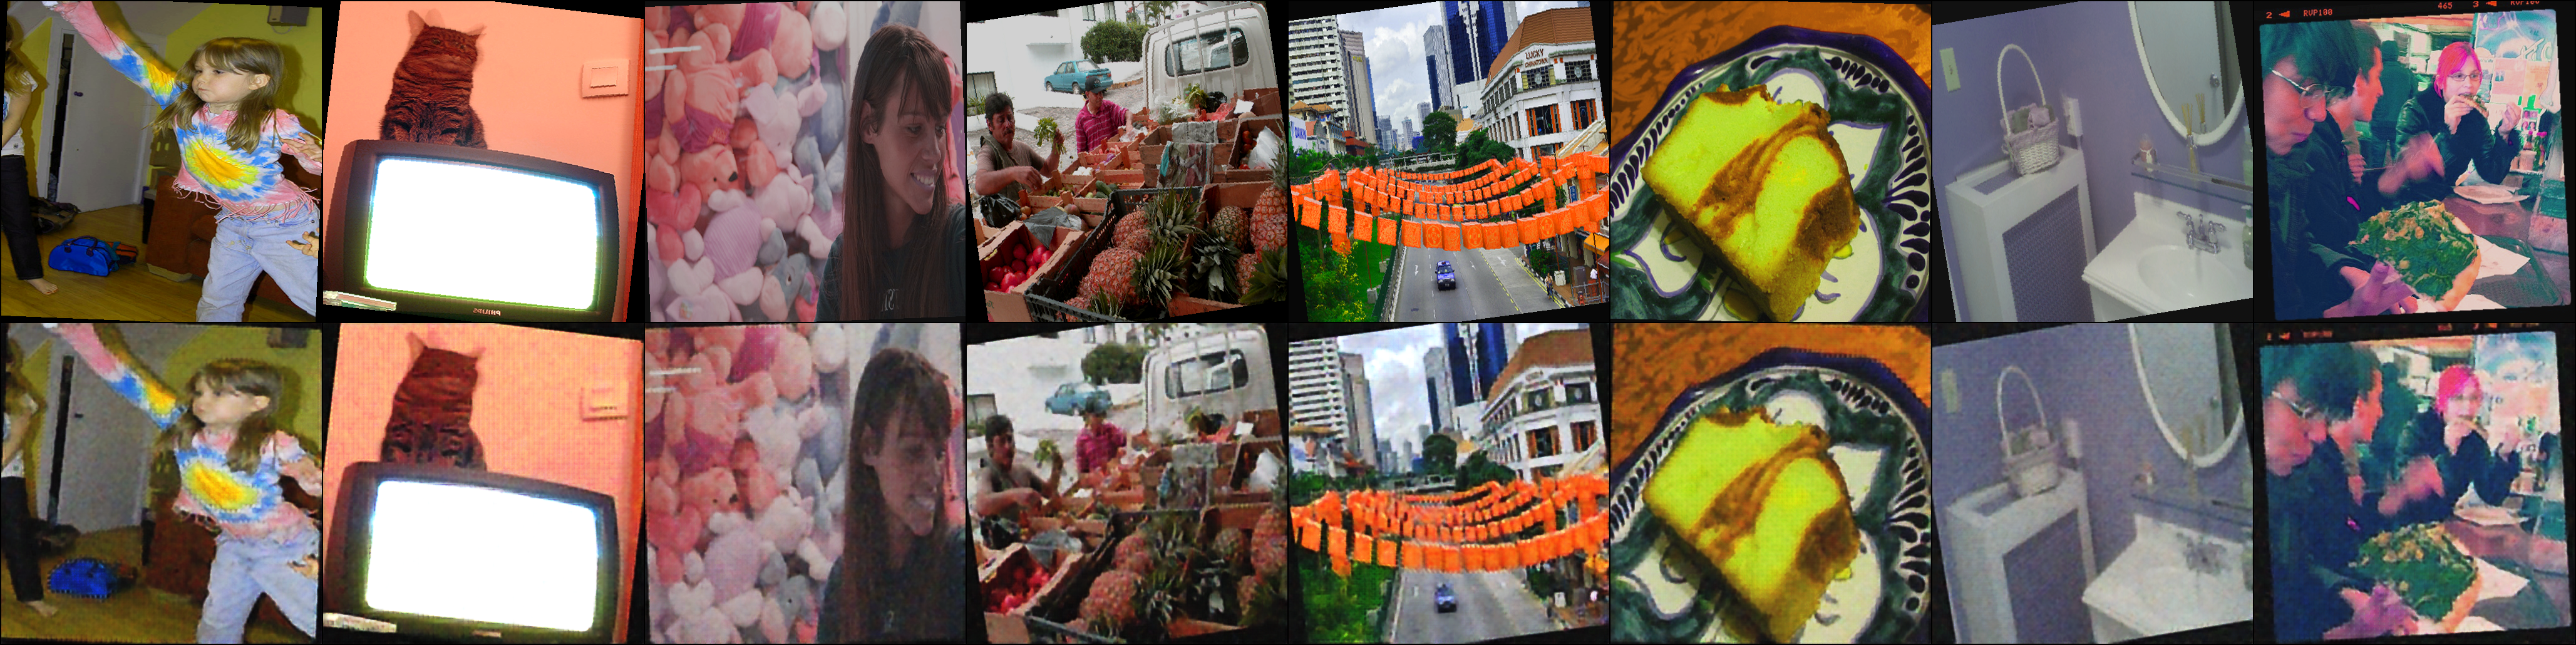

In [7]:
from IPython.display import Image

Image("samples/reconstruction_200.png")